In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from scipy import stats
from sklearn import linear_model
from sklearn.tree import export_graphviz
import pydot

import warnings
warnings.filterwarnings("ignore")

In [36]:
#Import Data
fp = "./Downloads/coffeedata.csv"
data = pd.read_csv(fp)
data.head()

,CupperPoints,ID,Country,HarvestYear,Variety,Process,Aroma,Flavor,Aftertaste,Acidity,...,MeanAlt,Address,Contact,Elevation,FullElevation,Precipitation,Temperature,Continent,NSHem,EWHem
0,10.00,263,Taiwan,2012,Unknown,Unknown,7.00,7.08,7.00,7.17,...,Unknown,10,10,1150.0,1150.0,2500.0,16.00,Asia,N,E
1,10.00,267,Taiwan,2012,Unknown,Unknown,7.25,7.25,7.00,7.08,...,200,10,10,1150.0,200.0,2500.0,16.00,Asia,N,E
2,10.00,277,Taiwan,2013,Unknown,Unknown,7.67,7.67,7.00,7.08,...,Unknown,10,10,1150.0,1150.0,2500.0,16.00,Asia,N,E
3,10.00,278,Taiwan,2012,Unknown,Unknown,7.58,7.58,7.17,7.17,...,Unknown,10,10,1150.0,1150.0,2500.0,16.00,Asia,N,E
4,9.25,1096,Guatemala,2010,Bourbon,Unknown,8.42,8.50,8.42,8.42,...,1700,2,2,759.0,1700.0,1996.0,23.45,North America,N,W


In [37]:
df = pd.DataFrame(data)

df['Process']=pd.Categorical(df['Process'])
dfProcessDummies = pd.get_dummies(df['Process'], prefix='Process')
df = pd.concat([df,dfProcessDummies],axis=1)

df['Color']=pd.Categorical(df['Color'])
dfColorDummies = pd.get_dummies(df['Process'],prefix='Color')
df = pd.concat([df,dfColorDummies],axis=1)

df['HarvestYear']=pd.Categorical(df['HarvestYear'])
dfHYDummies = pd.get_dummies(df['HarvestYear'],prefix='Year')
df = pd.concat([df,dfHYDummies],axis=1)

df['Variety']=pd.Categorical(df['Variety'])
dfVarDummies = pd.get_dummies(df['Variety'],prefix='Variety')
df = pd.concat([df,dfVarDummies],axis=1)

df['Continent']=pd.Categorical(df['Continent'])
dfContDummies = pd.get_dummies(df['Continent'],prefix='Cont')
df = pd.concat([df,dfContDummies],axis=1)

df['Contact']=pd.Categorical(df['Contact'])
dfContactDummies = pd.get_dummies(df['Contact'],prefix='Contact')
df = pd.concat([df,dfContactDummies],axis=1)

df.drop(['Country','HarvestYear','Variety','Process','Color','Continent','NSHem','EWHem',
         'Contact','Address','Elevation','ID','CupperPoints','MeanAlt'],
        axis=1,inplace=True)

cup = data['CupperPoints']
list(df)

['Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Cleanliness',
 'Sweetness',
 'Moisture',
 'C1Defect',
 'C2Defect',
 'Quakers',
 'FullElevation',
 'Precipitation',
 'Temperature',
 'Process_Natural / Dry',
 'Process_Other',
 'Process_Pulped natural / honey',
 'Process_Semi-washed / Semi-pulped',
 'Process_Unknown',
 'Process_Washed / Wet',
 'Color_Natural / Dry',
 'Color_Other',
 'Color_Pulped natural / honey',
 'Color_Semi-washed / Semi-pulped',
 'Color_Unknown',
 'Color_Washed / Wet',
 'Year_2009',
 'Year_2010',
 'Year_2011',
 'Year_2012',
 'Year_2013',
 'Year_2014',
 'Year_2015',
 'Year_2016',
 'Year_2017',
 'Year_2018',
 'Variety_Arusha',
 'Variety_Blue Mountain',
 'Variety_Bourbon',
 'Variety_Catimor',
 'Variety_Catuai',
 'Variety_Caturra',
 'Variety_Ethiopian Heirlooms',
 'Variety_Ethiopian Yirgacheffe',
 'Variety_Gesha',
 'Variety_Hawaiian Kona',
 'Variety_Java',
 'Variety_Mandheling',
 'Variety_Marigojipe',
 'Variety_Moka Peaberry',
 'Variet

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df, cup, train_size=0.85, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [39]:
#Unscaled
results_test = []
results_train = []
for i in range(1,70,1):
    rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=0)
    rf.fit(X_train.fillna(X_train.mean()), y_train)
    predicted_test = rf.predict(X_test.fillna(X_test.mean()))
    predicted_train = rf.predict(X_train.fillna(X_train.mean()))
    test_score = r2_score(y_test, predicted_test)
    train_score = r2_score(y_train, predicted_train)
    results_test.append(float(test_score))
    results_train.append(float(train_score))

Max Test = 95.11% R2
Max Train = 72.12% R2


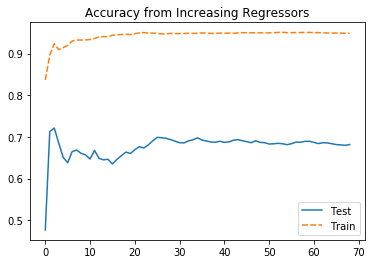

In [55]:
iteratedResults = pd.DataFrame({'Test':results_test, 'Train':results_train})
iteratedResults.head()
sns.lineplot(data=iteratedResults).set_title('Accuracy from Increasing Regressors')
print("Max Test = "+str(round(max(results_train)*100,2))+"% R2")
print("Max Train = "+str(round(max(results_test)*100,2))+"% R2")

In [59]:
#Scaled
results_test = []
results_train = []
for i in range(1,70,1):
    rf = RandomForestRegressor(n_estimators=i, random_state=0)
    rf.fit(X_train_scaled.fillna(X_train.mean()), y_train)
    predicted_test = rf.predict(X_test_scaled.fillna(X_test.mean()))
    predicted_train = rf.predict(X_train_scaled.fillna(X_train.mean()))
    test_score = r2_score(y_test, predicted_test)
    train_score = r2_score(y_train, predicted_train)
    results_test.append(float(test_score))
    results_train.append(float(train_score))

Max Test = 95.08% R2
Max Train = 72.84% R2


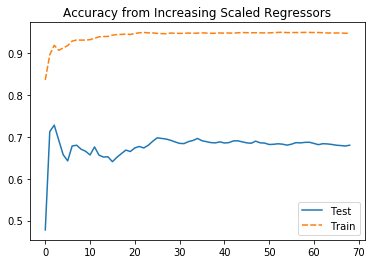

In [60]:
iteratedResults = pd.DataFrame({'Test':results_test, 'Train':results_train})
iteratedResults.head()
sns.lineplot(data=iteratedResults).set_title('Accuracy from Increasing Scaled Regressors')
print("Max Test = "+str(round(max(results_train)*100,2))+"% R2")
print("Max Train = "+str(round(max(results_test)*100,2))+"% R2")

In [61]:
rf = RandomForestRegressor(n_estimators=3, oob_score=True, random_state=0)
rf.fit(X_train.fillna(X_train.mean()), y_train)
predicted_train = rf.predict(X_train.fillna(X_train.mean()))
predicted_test = rf.predict(X_test.fillna(X_test.mean()))
test_score = r2_score(y_test, predicted_test)
print(str(round(test_score*100,2))+"% R2")

72.12% R2


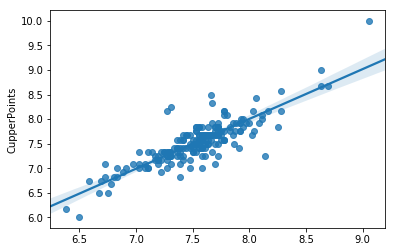

In [62]:
sns.regplot(predicted_test,y_test)

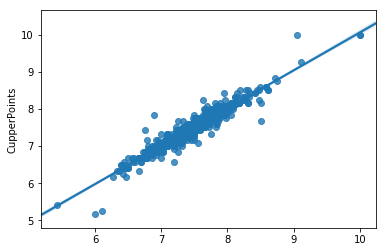

In [63]:
sns.regplot(predicted_train, y_train)

In [51]:
estimator = rf.estimators_[2]
export_graphviz(estimator, out_file = 'tree.dot', feature_names = list(X_train), rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')